# Assignment1, CMPT826

##  Step 4: Model Interpretation

* Seyedeh Mina Mousavifar
* 11279515
* sem311

### 100m Grid Size

In [66]:
import pandas as pd
import numpy as np
from pyproj import Proj
import os
import folium
from folium.plugins import HeatMap

gps_data = pd.read_pickle('data/gps_utm.pkl')

GRID_SIZE = 100

# find grid start point
start_x, start_y = gps_data.x.min(), gps_data.y.min()

# labeling grids
gps_data['x_grid'] = np.ceil((gps_data['x'] - start_x)/GRID_SIZE)
gps_data['y_grid'] = np.ceil((gps_data['y'] - start_y)/GRID_SIZE)

# save grid for future use
gps_data.to_pickle('data/gps_bin_100.pkl')

# count number of users in each cell
gps_grid = gps_data.groupby(['x_grid', 'y_grid']).agg(grid_count=('user_id', 'count')).reset_index()
gps_grid = gps_grid.astype({'grid_count': 'float64'})

# calculate center of grid to convert to latitude and longitude for heatmap plotting
gps_grid['x_center'] = gps_grid['x_grid']*GRID_SIZE - (0.5*GRID_SIZE) + start_x
gps_grid['y_center'] = gps_grid['y_grid']*GRID_SIZE - (0.5*GRID_SIZE) + start_y


# convert to latitude and longitude
myproj = Proj('epsg:32613', proj='utm', zone=13, ellps='WGS84', preserve_units=True)

gps_grid['lon_center'], gps_grid['lat_center'] = myproj(gps_grid['x_center'].values, 
                                                        gps_grid['y_center'].values, 
                                                        inverse=True)

# creating map
hmap_data = folium.Map(location=[52.058367, -106.7649138128])

# for better plotting max grid_count is given as the max heat
max_count = gps_grid.grid_count.max()

# plotting map
hm_wide = HeatMap(list(zip(gps_grid.lat_center.values, 
                           gps_grid.lon_center.values, 
                           gps_grid.grid_count.values)), 
                  radius=13)
    
# fit map zoom
hmap_data.fit_bounds([gps_grid[['lat_center', 'lon_center']].min().values.tolist(),
                      gps_grid[['lat_center', 'lon_center']].max().values.tolist()]) 

hmap_data.add_child(hm_wide)

# exporting map as html file
hmap_data.save(os.path.join('maps', 'sask_grid_100.html'))

hmap_data

### 400m Grid Size

In [67]:
gps_data = pd.read_pickle('data/gps_utm.pkl')

GRID_SIZE = 400

# find grid start point
start_x, start_y = gps_data.x.min(), gps_data.y.min()

# labeling grids
gps_data['x_grid'] = np.ceil((gps_data['x'] - start_x)/GRID_SIZE)
gps_data['y_grid'] = np.ceil((gps_data['y'] - start_y)/GRID_SIZE)

# save grid for future use
gps_data.to_pickle('data/gps_bin_400.pkl')

# count number of users in each cell
gps_grid = gps_data.groupby(['x_grid', 'y_grid']).agg(grid_count=('user_id', 'count')).reset_index()
gps_grid = gps_grid.astype({'grid_count': 'float64'})

# calculate center of grid to convert to latitude and longitude for heatmap plotting
gps_grid['x_center'] = gps_grid['x_grid']*GRID_SIZE - (0.5*GRID_SIZE) + start_x
gps_grid['y_center'] = gps_grid['y_grid']*GRID_SIZE - (0.5*GRID_SIZE) + start_y


# convert to latitude and longitude
myproj = Proj('epsg:32613', proj='utm', zone=13, ellps='WGS84', preserve_units=True)

gps_grid['lon_center'], gps_grid['lat_center'] = myproj(gps_grid['x_center'].values, 
                                                        gps_grid['y_center'].values, 
                                                        inverse=True)

# creating map
hmap_data = folium.Map(location=[52.058367, -106.7649138128])

# for better plotting max grid_count is given as the max heat
max_count = gps_grid.grid_count.max()

# plotting map
hm_wide = HeatMap(list(zip(gps_grid.lat_center.values, 
                           gps_grid.lon_center.values, 
                           gps_grid.grid_count.values)), 
                  radius=13)
    
# fit map zoom
hmap_data.fit_bounds([gps_grid[['lat_center', 'lon_center']].min().values.tolist(),
                      gps_grid[['lat_center', 'lon_center']].max().values.tolist()]) 

hmap_data.add_child(hm_wide)

# exporting map as html file
hmap_data.save(os.path.join('maps', 'sask_grid_400.html'))

hmap_data

### 1600m Grid Size

In [68]:
gps_data = pd.read_pickle('data/gps_utm.pkl')

GRID_SIZE = 1600

# find grid start point
start_x, start_y = gps_data.x.min(), gps_data.y.min()

# labeling grids
gps_data['x_grid'] = np.ceil((gps_data['x'] - start_x)/GRID_SIZE)
gps_data['y_grid'] = np.ceil((gps_data['y'] - start_y)/GRID_SIZE)

# save grid for future use
gps_data.to_pickle('data/gps_bin_1600.pkl')

# count number of users in each cell
gps_grid = gps_data.groupby(['x_grid', 'y_grid']).agg(grid_count=('user_id', 'count')).reset_index()
gps_grid = gps_grid.astype({'grid_count': 'float64'})

# calculate center of grid to convert to latitude and longitude for heatmap plotting
gps_grid['x_center'] = gps_grid['x_grid']*GRID_SIZE - (0.5*GRID_SIZE) + start_x
gps_grid['y_center'] = gps_grid['y_grid']*GRID_SIZE - (0.5*GRID_SIZE) + start_y


# convert to latitude and longitude
myproj = Proj('epsg:32613', proj='utm', zone=13, ellps='WGS84', preserve_units=True)

gps_grid['lon_center'], gps_grid['lat_center'] = myproj(gps_grid['x_center'].values, 
                                                        gps_grid['y_center'].values, 
                                                        inverse=True)

# creating map
hmap_data = folium.Map(location=[52.058367, -106.7649138128])

# for better plotting max grid_count is given as the max heat
max_count = gps_grid.grid_count.max()

# plotting map
hm_wide = HeatMap(list(zip(gps_grid.lat_center.values, 
                           gps_grid.lon_center.values, 
                           gps_grid.grid_count.values)), 
                  radius=13)
    
hmap_data.add_child(hm_wide)

# exporting map as html file
hmap_data.save(os.path.join('maps', 'sask_grid_1600.html'))

hmap_data

### Plotting Dwell Time and Visit Frequency

#### 100m Grid Size

In [69]:
gps_data = pd.read_pickle('data/gps_bin_100.pkl')

################# Dwell Time
# sort dataset
gps_data = gps_data.sort_values(['user_id', 'duty_num']).dropna()
gps_data = gps_data.astype({'x_grid': 'int32', 'y_grid': 'int32'}).astype({'x_grid': 'str', 'y_grid': 'str'})

# creating grid cell labels (x,y)
gps_data['grid_label'] = gps_data['x_grid'] + ',' + gps_data['y_grid']
gps_data = gps_data.astype({'x_grid': 'int32', 'y_grid': 'int32'})

# compare to shifted version
gps_data['dwell_condition'] = np.where(gps_data['grid_label'] == gps_data['grid_label'].shift(1), 1, 0)
# compare to not count same users in same grid as dwell time
gps_data['dwell_condition'] = np.where(gps_data['user_id'] == gps_data['user_id'].shift(1), gps_data['dwell_condition'], 0)

gps_dwell = gps_data.groupby(['user_id', 'grid_label']).agg(dwell = ('dwell_condition', 'sum')).reset_index()

# multiply by duty cycle length to find time
gps_dwell['dwell_time'] = gps_dwell['dwell'].apply(lambda x: x*5)

# calculate count of dwells for futher plotting
dwell_count_100 = gps_dwell.groupby(['dwell_time']).size().reset_index(name='count')

################# Visit Frequency

# compare to shifted version
gps_data['visit_condition'] = np.where(gps_data['grid_label'] != gps_data['grid_label'].shift(1), 1, 0)
# compare to not count same users in same grid as visit frequency
gps_data['visit_condition'] = np.where(gps_data['user_id'] == gps_data['user_id'].shift(1), gps_data['visit_condition'], 0)

gps_visit = gps_data.groupby(['user_id', 'grid_label']).agg(visit = ('visit_condition', 'sum')).reset_index()

# calculate count of visit frequencies for futher plotting
visit_100 = gps_visit.groupby(['visit']).size().reset_index(name='count')

#### 400m Grid Size

In [70]:
gps_data = pd.read_pickle('data/gps_bin_400.pkl')

################# Dwell Time
# sort dataset
gps_data = gps_data.sort_values(['user_id', 'duty_num']).dropna()
gps_data = gps_data.astype({'x_grid': 'int32', 'y_grid': 'int32'}).astype({'x_grid': 'str', 'y_grid': 'str'})

# creating grid cell labels (x,y)
gps_data['grid_label'] = gps_data['x_grid'] + ',' + gps_data['y_grid']
gps_data = gps_data.astype({'x_grid': 'int32', 'y_grid': 'int32'})

# compare to shifted version
gps_data['dwell_condition'] = np.where(gps_data['grid_label'] == gps_data['grid_label'].shift(1), 1, 0)
# compare to not count same users in same grid as dwell time
gps_data['dwell_condition'] = np.where(gps_data['user_id'] == gps_data['user_id'].shift(1), gps_data['dwell_condition'], 0)

gps_dwell = gps_data.groupby(['user_id', 'grid_label']).agg(dwell = ('dwell_condition', 'sum')).reset_index()

# multiply by duty cycle length to find time
gps_dwell['dwell_time'] = gps_dwell['dwell'].apply(lambda x: x*5)

# calculate count of dwells for futher plotting
dwell_count_400 = gps_dwell.groupby(['dwell_time']).size().reset_index(name='count')

################# Visit Frequency

# compare to shifted version
gps_data['visit_condition'] = np.where(gps_data['grid_label'] != gps_data['grid_label'].shift(1), 1, 0)
# compare to not count same users in same grid as visit frequency
gps_data['visit_condition'] = np.where(gps_data['user_id'] == gps_data['user_id'].shift(1), gps_data['visit_condition'], 0)

gps_visit = gps_data.groupby(['user_id', 'grid_label']).agg(visit = ('visit_condition', 'sum')).reset_index()

# calculate count of visit frequencies for futher plotting
visit_400 = gps_visit.groupby(['visit']).size().reset_index(name='count')

#### 1600m Grid Size

In [71]:
gps_data = pd.read_pickle('data/gps_bin_1600.pkl')

################# Dwell Time
# sort dataset
gps_data = gps_data.sort_values(['user_id', 'duty_num']).dropna()
gps_data = gps_data.astype({'x_grid': 'int32', 'y_grid': 'int32'}).astype({'x_grid': 'str', 'y_grid': 'str'})

# creating grid cell labels (x,y)
gps_data['grid_label'] = gps_data['x_grid'] + ',' + gps_data['y_grid']
gps_data = gps_data.astype({'x_grid': 'int32', 'y_grid': 'int32'})

# compare to shifted version
gps_data['dwell_condition'] = np.where(gps_data['grid_label'] == gps_data['grid_label'].shift(1), 1, 0)
# compare to not count same users in same grid as dwell time
gps_data['dwell_condition'] = np.where(gps_data['user_id'] == gps_data['user_id'].shift(1), gps_data['dwell_condition'], 0)

gps_dwell = gps_data.groupby(['user_id', 'grid_label']).agg(dwell = ('dwell_condition', 'sum')).reset_index()

# multiply by duty cycle length to find time
gps_dwell['dwell_time'] = gps_dwell['dwell'].apply(lambda x: x*5)

# calculate count of dwells for futher plotting
dwell_count_1600 = gps_dwell.groupby(['dwell_time']).size().reset_index(name='count')

################# Visit Frequency

# compare to shifted version
gps_data['visit_condition'] = np.where(gps_data['grid_label'] != gps_data['grid_label'].shift(1), 1, 0)
# compare to not count same users in same grid as visit frequency
gps_data['visit_condition'] = np.where(gps_data['user_id'] == gps_data['user_id'].shift(1), gps_data['visit_condition'], 0)

gps_visit = gps_data.groupby(['user_id', 'grid_label']).agg(visit = ('visit_condition', 'sum')).reset_index()

# calculate count of visit frequencies for futher plotting
visit_1600 = gps_visit.groupby(['visit']).size().reset_index(name='count')

#### Plot

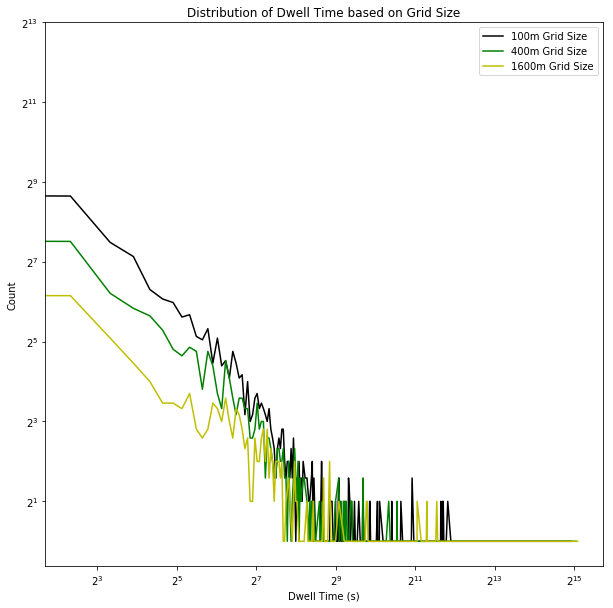

In [72]:
import matplotlib.pyplot as plt

# set size of figure
plt.figure(figsize=(10, 10))
# set title
plt.title('Distribution of Dwell Time based on Grid Size')
plt.xlabel('Dwell Time (s)')
plt.ylabel('Count')

plt.plot(dwell_count_100['dwell_time'], dwell_count_100['count'], 'k', label='100m Grid Size')
plt.plot(dwell_count_400['dwell_time'], dwell_count_400['count'], 'g', label='400m Grid Size')
plt.plot(dwell_count_1600['dwell_time'], dwell_count_1600['count'], 'y', label='1600m Grid Size')

plt.xscale('log', basex=2)
plt.yscale('log', basey=2)

plt.legend()

plt.show()

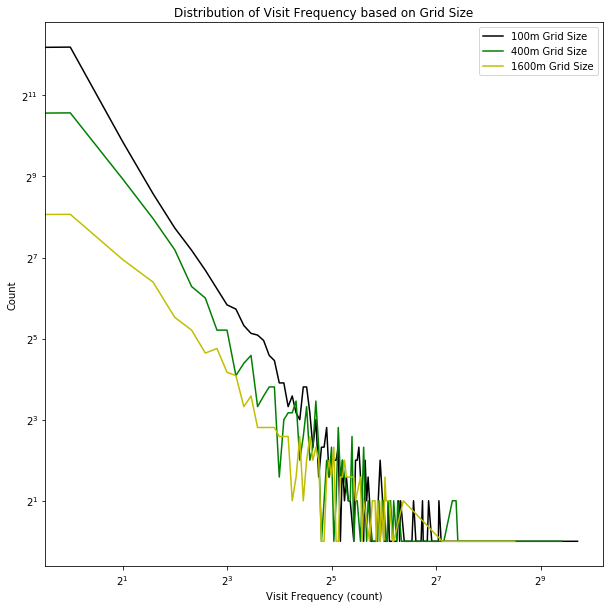

In [73]:
# set size of figure
plt.figure(figsize=(10, 10))
# set title
plt.title('Distribution of Visit Frequency based on Grid Size')
plt.xlabel('Visit Frequency (count)')
plt.ylabel('Count')

plt.plot(visit_100['visit'], visit_100['count'], 'k', label='100m Grid Size')
plt.plot(visit_400['visit'], visit_400['count'], 'g', label='400m Grid Size')
plt.plot(visit_1600['visit'], visit_1600['count'], 'y', label='1600m Grid Size')

plt.xscale('log', basex=2)
plt.yscale('log', basey=2)

plt.legend()

plt.show()

What are the properties of these curves (what distributions are you likely looking at)? 

> These curves are similar to *Powerlaw Distribution*. Because they are quite linear in a log-log plot, and heavy tailed.

How has the shape properties changed with spatial resolution?

> The change in grid size didn't change the distribution of our data. So dwell time, and visit frequency distributions are still Power-law, but their corresponding parameters are changing. We can see that as the grid size increases, the slope of the curves is decreasing, and they are showing more curvature. Power-law distribution formula is $f(x) = {\alpha}x^k$ with two parameters of $\alpha$ and $k$. As the grid size increases, $k$ decreases because of slope and $\alpha$ increases because of curvature. So analyzing the data at different resolutions should be done cautiously.